In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pylab
from IPython.display import display
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()  
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline
import os
import pandas
from scipy.stats import chi2_contingency
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
nltk.download('punkt')
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import *
import re 
from scipy import stats
from scipy.stats import chi2_contingency 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import chi2
from bioinfokit.analys import stat
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency 

[nltk_data] Downloading package punkt to C:\Users\Nick
[nltk_data]     Molliconi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
RN = pd.read_csv('data_2_4_v1.csv')

# DATA PREPRATION EDA

In [7]:
RN.rename(columns={'What is your age group as of today?  ':'AgeGroup'},inplace=True)

In [8]:
RNAGE = pd.DataFrame({'AgeGroup': RN['AgeGroup']})

In [9]:
RNAGE=RNAGE.dropna()

In [10]:
RNAGE['AgeGroup']=RNAGE['AgeGroup'].replace(['18-24'],'18-44')
RNAGE['AgeGroup']=RNAGE['AgeGroup'].replace(['25-34'],'18-44')
RNAGE['AgeGroup']=RNAGE['AgeGroup'].replace(['35-44'],'18-44')
RNAGE['AgeGroup']=RNAGE['AgeGroup'].replace(['45-54'],'45+')
RNAGE['AgeGroup']=RNAGE['AgeGroup'].replace(['55-64'],'45+')
RNAGE['AgeGroup']=RNAGE['AgeGroup'].replace(['65+'],'45+')

In [11]:
RN.rename(columns={'What is the highest level of education you have completed?':'Education_Level'},inplace=True)

In [12]:
RNED = pd.DataFrame({'Education_Level': RN['Education_Level']})

In [13]:
RNED=RNED.dropna()


In [14]:
RN.rename(columns={'In what year were you first licensed as a nurse?  Please enter your response in the space provided below. ':'Year_Licensed'},inplace=True)

In [15]:
RNYL = pd.DataFrame({'Year_Licensed': RN['Year_Licensed']})

In [16]:
RNYL['Year_Licensed']=RNYL['Year_Licensed'].replace(['Minnesota'],'nan')

In [17]:
RNYL['Year_Licensed']=RNYL['Year_Licensed'].replace(['I was licensed as an RN in 2011 and an LPN in 2004. '],'nan')

In [18]:
RNYL=RNYL.dropna()


In [19]:
RN.rename(columns={'How long have you been licensed at your current level of nursing practice?':'Current_Level_Length_Licensed'},inplace=True)

In [20]:
RNLYL = pd.DataFrame({'Current_Level_Length_Licensed': RN['Current_Level_Length_Licensed']})

In [21]:
RNLYL=RNLYL.dropna()


In [22]:
RN.rename(columns={'In what type of facility did you work as a nurse as of January 1, 2019?Please choose ONE of the following that best describes your most common work facility at that time.  ':'Facility_Worked_2019'},inplace=True)

In [23]:
RNFAC2019 = pd.DataFrame({'Facility_Worked_2019': RN['Facility_Worked_2019']})

In [24]:
RNFAC2019=RNFAC2019.dropna()


In [25]:
RNFAC2019['Facility_Worked_2019']=RNFAC2019['Facility_Worked_2019'].replace(['Other:Please write the facility type in the space provided below.'],'Other')

In [26]:
RNFAC2019['Facility_Worked_2019']=RNFAC2019['Facility_Worked_2019'].replace(['Outpatient clinical (primary care or specialty)'],'Outpatient')

In [27]:
RN.rename(columns={'If you worked in acute care hospital as of January 1, 2019, in what area of the hospital did you work?Please select the ONE that reflects your primary unit/department.':'Facility_Department_2019'},inplace=True)

In [28]:
RNFDEPT2019 = pd.DataFrame({'Facility_Department_2019': RN['Facility_Department_2019']})

In [29]:
RNFDEPT2019=RNFDEPT2019.dropna()
RNFDEPT2019['Facility_Department_2019']=RNFDEPT2019['Facility_Department_2019'].replace(['OB / Women and Infants (including mother / baby or postpartum)'],'OB/MOM/BABY')
RNFDEPT2019['Facility_Department_2019']=RNFDEPT2019['Facility_Department_2019'].replace(['Other:Please enter your unit or department in the space below.'],'Other')
RNFDEPT2019['Facility_Department_2019']=RNFDEPT2019['Facility_Department_2019'].replace(['Not in direct patient care (i.e. education, research, management/leadership, care management, informatics, etc.)'
                                                                                        ],'Non Pt Care')

In [30]:
RN.rename(columns={'In what type of facility do you currently work as a nurse?Please choose ONE of the following that best describes your most common work facility at that time.':'Current_Facility_Worked'},inplace=True)

In [31]:
RNFCURRENT = pd.DataFrame({'Current_Facility_Worked': RN['Current_Facility_Worked']})

In [32]:
RNFCURRENT=RNFCURRENT.dropna()


In [33]:
RNFCURRENT['Current_Facility_Worked']=RNFCURRENT['Current_Facility_Worked'].replace(['Other:Please write the facility type in the space provided below.'],'Other')
RNFCURRENT['Current_Facility_Worked']=RNFCURRENT['Current_Facility_Worked'].replace(['Outpatient clinical (primary care or specialty)'],'Outpatient')

In [34]:
RN.rename(columns={'If you work in acute care as of today, in what area of the hospital do you work?Please select the ONE that reflects your primary unit/department.':'Current_Facility_Department_Worked'},inplace=True)

In [35]:
RNFDCURRENT = pd.DataFrame({'Current_Facility_Department_Worked': RN['Current_Facility_Department_Worked']})

In [36]:
RNFDCURRENT=RNFDCURRENT.dropna()


In [37]:
RNFDCURRENT['Current_Facility_Department_Worked']=RNFDCURRENT['Current_Facility_Department_Worked'].replace(['OB / Women and Infants (including mother / baby or postpartum)'],'OB/MOM/BABY')
RNFDCURRENT['Current_Facility_Department_Worked']=RNFDCURRENT['Current_Facility_Department_Worked'].replace(['Other:Please enter your unit or department in the space below.'],'Other')
RNFDCURRENT['Current_Facility_Department_Worked']=RNFDCURRENT['Current_Facility_Department_Worked'].replace(['Not in direct patient care (i.e. education, research, management/leadership, care management, informatics, etc.)'
                                                                                        ],'Non Pt Care')

In [38]:
RN.rename(columns={'What was your annual range as of January 1, 2019?':'Salary_in_2019'},inplace=True)

In [39]:
RNSAL2019 = pd.DataFrame({'Salary_in_2019': RN['Salary_in_2019']})

In [40]:
RNSAL2019=RNSAL2019.dropna()


In [41]:
RNSAL2019['Salary_in_2019']=RNSAL2019['Salary_in_2019'].replace(['$55,000to$65,000'],'$55,000-$65,000')

In [42]:
RN.rename(columns={'What is your annual range as of today?':'Salary_Current'},inplace=True)

In [43]:
RNSALCUR = pd.DataFrame({'Salary_Current': RN['Salary_Current']})

In [44]:
RNSALCUR=RNSALCUR.dropna()


In [45]:
RN.rename(columns={'Have you changed jobs since January 1, 2019? ':'ChangedJob2019'},inplace=True)

In [46]:
RNJOBCHG2019 = pd.DataFrame({'ChangedJob2019': RN['ChangedJob2019']})

In [47]:
RNJOBCHG2019=RNJOBCHG2019.dropna()


In [48]:
RN.rename(columns={'Are you planning to change jobs in the next six months?':'ChangedJobIN6MOS'},inplace=True)

In [49]:
RNJOB6MO = pd.DataFrame({'ChangedJobIN6MOS': RN['ChangedJobIN6MOS']})

In [50]:
RNJOB6MO=RNJOB6MO.dropna()


In [51]:
RN.rename(columns={'Are you planning to leave the nursing profession entirely within the next six months?':'LeavingJobIN6MOS'},inplace=True)

In [52]:
RNLEAVEJOB6MO = pd.DataFrame({'LeavingJobIN6MOS': RN['LeavingJobIN6MOS']})

In [53]:
RNLEAVEJOB6MO=RNLEAVEJOB6MO.dropna()


In [54]:
RN.rename(columns={'Which of the following is your typical shift?':'Shift'},inplace=True)

In [55]:
RNSHIFT = pd.DataFrame({'Shift': RN['Shift']})

In [56]:
RNSHIFT=RNSHIFT.dropna()


In [57]:
RN.rename(columns={'What do you like least about being a nurse?':'LeastLikeRN'},inplace=True)

In [58]:
RNLL = pd.DataFrame({'LeastLikeRN': RN['LeastLikeRN']})

In [59]:
RNLL=RNLL.dropna()

In [60]:
RN.rename(columns={'What do you find most challenging about being a nurse?':'ChallengeRN'},inplace=True)

In [61]:
RNCH = pd.DataFrame({'ChallengeRN': RN['ChallengeRN']})

In [62]:
RNCH = RNCH.dropna()

In [63]:
RN2 = pd.DataFrame(columns=['ChallengeRN','LeastLikeRN','Shift,LeavingJobIN6MOS','ChangedJobIN6MOS','ChangedJob2019','Salary_Current','Salary_in_2019','Current_Facility_Department_Worked','Current_Facility_Worked','Factility_Department_2019','Facility_Worked_2019','AgeGroup','Education_Level','Year_Licensed','Current_Level_Length_Licensed'])
RN2[['AgeGroup']] = RN[['AgeGroup']]
RN2[['Education_Level']] = RNED[['Education_Level']]
RN2[['Year_Licensed']] = RNYL[['Year_Licensed']]
RN2[['Current_Level_Length_Licensed']] = RNLYL[['Current_Level_Length_Licensed']]
RN2[['Facility_Worked_2019']] = RNFAC2019[['Facility_Worked_2019']]
RN2[['Facility_Department_2019']] = RNFDEPT2019[['Facility_Department_2019']]
RN2[['Current_Facility_Worked']] = RNFCURRENT[['Current_Facility_Worked']]
RN2[['Current_Facility_Department_Worked']] = RNFDCURRENT[['Current_Facility_Department_Worked']]
RN2[['Salary_in_2019']] = RNSAL2019[['Salary_in_2019']]
RN2[['Salary_Current']] = RNSALCUR[['Salary_Current']]
RN2[['ChangedJob2019']] = RNJOBCHG2019[['ChangedJob2019']]
RN2[['ChangedJobIN6MOS']] = RNJOB6MO[['ChangedJobIN6MOS']]
RN2[['LeavingJobIN6MOS']] = RNLEAVEJOB6MO[['LeavingJobIN6MOS']]
RN2[['Shift']] = RNSHIFT[['Shift']]
RN2[['LeastLikeRN']] = RN[['LeastLikeRN']]
RN2[['ChallengeRN']] = RN[['ChallengeRN']]



In [64]:
RN2.columns

Index(['ChallengeRN', 'LeastLikeRN', 'Shift,LeavingJobIN6MOS',
       'ChangedJobIN6MOS', 'ChangedJob2019', 'Salary_Current',
       'Salary_in_2019', 'Current_Facility_Department_Worked',
       'Current_Facility_Worked', 'Factility_Department_2019',
       'Facility_Worked_2019', 'AgeGroup', 'Education_Level', 'Year_Licensed',
       'Current_Level_Length_Licensed', 'Facility_Department_2019',
       'LeavingJobIN6MOS', 'Shift'],
      dtype='object')

In [65]:
RN2['AgeGroup']=RN2['AgeGroup'].replace(['18-24'],'18-44')
RN2['AgeGroup']=RN2['AgeGroup'].replace(['25-34'],'18-44')
RN2['AgeGroup']=RN2['AgeGroup'].replace(['35-44'],'18-44')
RN2['AgeGroup']=RN2['AgeGroup'].replace(['45-54'],'45+')
RN2['AgeGroup']=RN2['AgeGroup'].replace(['55-64'],'45+')
RN2['AgeGroup']=RN2['AgeGroup'].replace(['65+'],'45+')
RN2['AgeGroup']=RN2['AgeGroup'].replace(['nan'],'0')

In [66]:
RN2.columns

Index(['ChallengeRN', 'LeastLikeRN', 'Shift,LeavingJobIN6MOS',
       'ChangedJobIN6MOS', 'ChangedJob2019', 'Salary_Current',
       'Salary_in_2019', 'Current_Facility_Department_Worked',
       'Current_Facility_Worked', 'Factility_Department_2019',
       'Facility_Worked_2019', 'AgeGroup', 'Education_Level', 'Year_Licensed',
       'Current_Level_Length_Licensed', 'Facility_Department_2019',
       'LeavingJobIN6MOS', 'Shift'],
      dtype='object')

In [67]:
RN2=RN2.drop(0)

# EDA

[Text(0, 0, '70'), Text(0, 0, '48')]

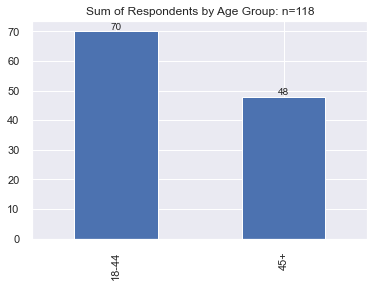

In [68]:
%matplotlib inline
#get value counts
counts = RN2['AgeGroup'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='Sum of Respondents by Age Group: n=118')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '72'),
 Text(0, 0, '31'),
 Text(0, 0, '7'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

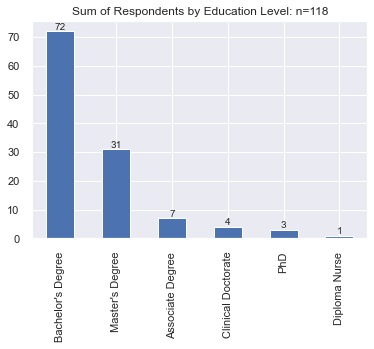

In [69]:
%matplotlib inline
#get value counts
counts = RN2['Education_Level'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='Sum of Respondents by Education Level: n=118')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

<AxesSubplot:title={'center':'Sum of Respondents by Year Licensed'}>

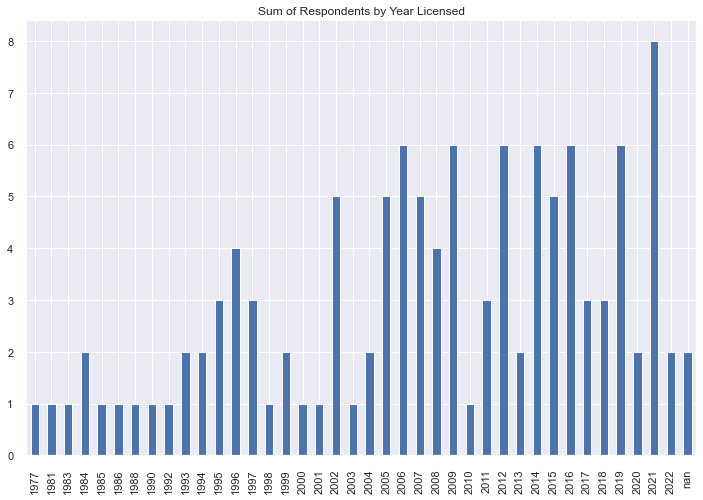

In [70]:
RN2['Year_Licensed'].value_counts().sort_index().plot.bar(figsize=(12,8),title='Sum of Respondents by Year Licensed')


[Text(0, 0, '39'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '8')]

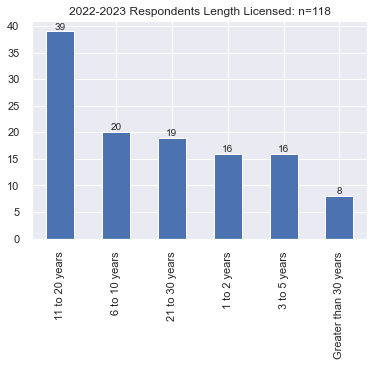

In [71]:
%matplotlib inline
#get value counts
counts = RN2['Current_Level_Length_Licensed'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='2022-2023 Respondents Length Licensed: n=118')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '75'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2')]

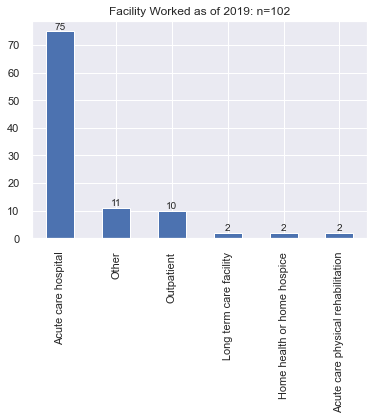

In [72]:
%matplotlib inline
#get value counts
counts = RN2['Facility_Worked_2019'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='Facility Worked as of 2019: n=102')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '19'),
 Text(0, 0, '15'),
 Text(0, 0, '12'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '2')]

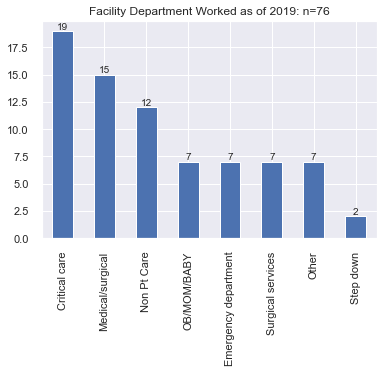

In [73]:
%matplotlib inline
#get value counts
counts = RN2['Facility_Department_2019'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='Facility Department Worked as of 2019: n=76')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '76'),
 Text(0, 0, '19'),
 Text(0, 0, '17'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

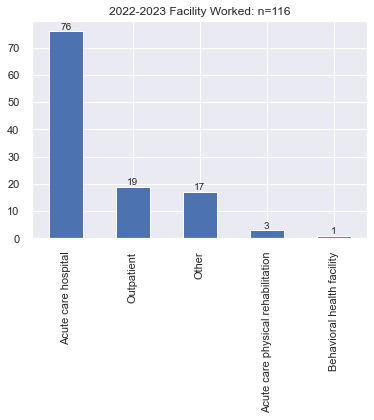

In [74]:
%matplotlib inline
#get value counts
counts = RN2['Current_Facility_Worked'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='2022-2023 Facility Worked: n=116')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '23'),
 Text(0, 0, '17'),
 Text(0, 0, '14'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2')]

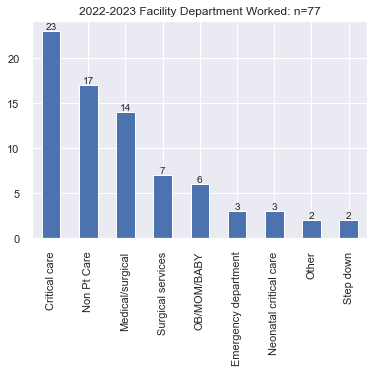

In [75]:
%matplotlib inline
#get value counts
counts = RN2['Current_Facility_Department_Worked'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='2022-2023 Facility Department Worked: n=77')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '23'),
 Text(0, 0, '21'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

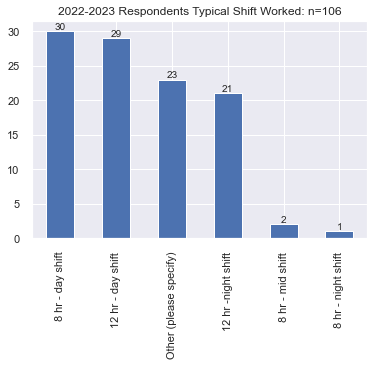

In [76]:
%matplotlib inline
#get value counts
counts = RN2['Shift'].value_counts()
# Plot the value counts
ax=counts.plot(kind='bar', title='2022-2023 Respondents Typical Shift Worked: n=106')
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

<AxesSubplot:title={'center':'Salary as of 2019'}, ylabel='Salary_in_2019'>

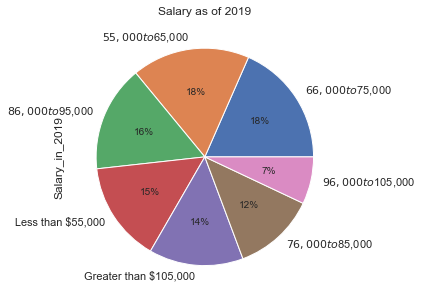

In [77]:
RN2['Salary_in_2019'].value_counts().plot.pie(figsize=(12,5),autopct='%1.0f%%', title='Salary as of 2019')

<AxesSubplot:title={'center':'2022-2023 Respondents Salary'}, ylabel='Salary_Current'>

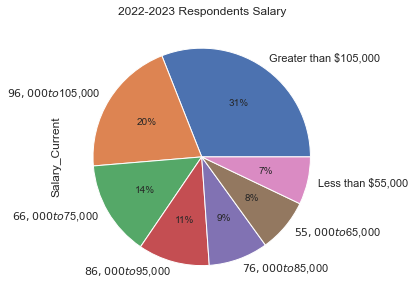

In [78]:
RN2['Salary_Current'].value_counts().plot.pie(figsize=(12,5),autopct='%1.0f%%', title='2022-2023 Respondents Salary')

<AxesSubplot:title={'center':'Changed Job Since 2019'}, ylabel='ChangedJob2019'>

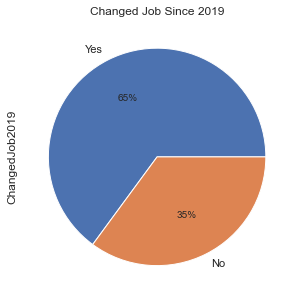

In [79]:
RN2['ChangedJob2019'].value_counts().plot.pie(figsize=(12,5),autopct='%1.0f%%', title='Changed Job Since 2019')

<AxesSubplot:title={'center':'Planning on Changing Job In Next 6 Months'}, ylabel='ChangedJobIN6MOS'>

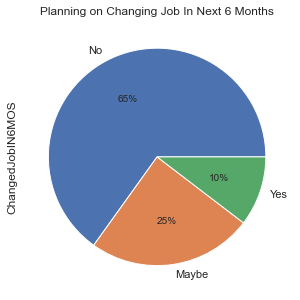

In [80]:
RN2['ChangedJobIN6MOS'].value_counts().plot.pie(figsize=(12,5),autopct='%1.0f%%', title='Planning on Changing Job In Next 6 Months')

<AxesSubplot:title={'center':'Leaving RN Job in last 6 Months'}, ylabel='LeavingJobIN6MOS'>

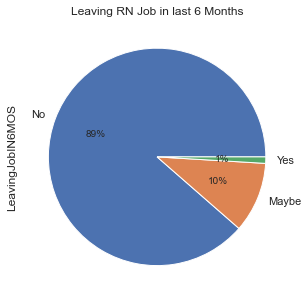

In [81]:
RN2['LeavingJobIN6MOS'].value_counts().plot.pie(figsize=(12,5),autopct='%1.0f%%', title='Leaving RN Job in last 6 Months')

# ANALYSIS

### H0: 1.	H0: Staff age forty-five and older (45+) will have a higher probability leaving the profession within six (6) months.

### H1: Staff age forty-five and older (45+)  will not have a higher probability of leaving the profession within six (6) months.

In [82]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RN2['AgeGroup'], RN2['LeavingJobIN6MOS'])
contigency_pct


LeavingJobIN6MOS,Maybe,No,Yes
AgeGroup,,,
18-44,7,54,1
45+,4,39,0


In [83]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.6614954723209637

In [84]:
coef, p = spearmanr(RN2['AgeGroup'], RN2['LeavingJobIN6MOS'],nan_policy='omit')
seed(1)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### H0: Critical Care department staff will have a higher probability of leaving the profession within 6 months
### H1: Critical Care department staff will not have a higher probability of leaving the profession within 6 months

In [ ]:
RNCC = pd.DataFrame({'Current_Facility_Department_Worked': RN2['Current_Facility_Department_Worked']})

In [ ]:
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'Non Pt Care']
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'Medical/surgical']
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'Surgical services']
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'OB/MOM/BABY']
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'Neonatal critical care']
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'Other']
RNCC = RNCC[RNCC.Current_Facility_Department_Worked != 'Step down']

In [ ]:
RNCC['Current_Facility_Department_Worked']=RNCC['Current_Facility_Department_Worked'].replace(['Emergency department'],'Critical care')

In [ ]:
RNCC.dropna()

In [ ]:
from scipy.stats import chi2_contingency 
contigency_pct = pd.crosstab(RNCC['Current_Facility_Department_Worked'], RN2['LeavingJobIN6MOS'])
contigency_pct

In [ ]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

In [ ]:
coef, p = spearmanr(RNCC['Current_Facility_Department_Worked'], RN2['LeavingJobIN6MOS'])
seed(1)
coef, p = spearmanr(RNCC['Current_Facility_Department_Worked'], RN2['LeavingJobIN6MOS'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

# SENTIMENT ANALYSIS

In [ ]:
RNLL = pd.DataFrame({'LeastLikeRN': RN2['LeastLikeRN']})

In [ ]:
RNLL

In [ ]:
RN2.columns

In [ ]:
RNLL = RNLL.dropna()


In [ ]:
RNLL=RNLL.drop(0)

In [ ]:
RNLL

In [ ]:
import nltk
fd = nltk.FreqDist(' '.join(RNLL).split())
fd.most_common(20)

In [ ]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.append("")

In [ ]:
filtered_words = []
for w in fd:
    w = w.lower()
    w = re.sub("[^a-zA-Z]+", "", w)
    if w not in stops:
        filtered_words.append(w)

In [ ]:
filtered_words

In [ ]:
cleaned_fd = nltk.FreqDist(filtered_words)
cleaned_fd.most_common(20)

In [ ]:
all_text = str(RNLL.tolist())
all_text =  all_text.lower()
all_text = re.sub("[^a-zA-Z]+", " ", all_text)
text_tokens = word_tokenize(all_text)
tokens_without_sw = [word for word in text_tokens if not word in stops]
filtered_text = (" ").join(tokens_without_sw)
filtered_text

In [ ]:
def compute_freq(text, n_value=2):

    tokens = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

In [ ]:
freq_dist = compute_freq(filtered_text)

In [ ]:
freq_dist.most_common(75)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in RNLL.LeastLikeRN:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
RNLL = pd.DataFrame(columns='LeastLikeRN')

In [ ]:
RNCRN.dropna()

In [ ]:
import nltk
fd = nltk.FreqDist(' '.join(RNCRN).split())
fd.most_common(20)

In [ ]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.append("")

In [ ]:
filtered_words = []
for w in fd:
    w = w.lower()
    w = re.sub("[^a-zA-Z]+", "", w)
    if w not in stops:
        filtered_words.append(w)

In [ ]:
filtered_words

In [ ]:
cleaned_fd = nltk.FreqDist(filtered_words)
cleaned_fd.most_common(20)

In [ ]:
all_text = str(RNLL.tolist())
all_text =  all_text.lower()
all_text = re.sub("[^a-zA-Z]+", " ", all_text)
text_tokens = word_tokenize(all_text)
tokens_without_sw = [word for word in text_tokens if not word in stops]
filtered_text = (" ").join(tokens_without_sw)
filtered_text

In [ ]:
def compute_freq(text, n_value=2):

    tokens = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n_value)
    ngram_fdist = nltk.FreqDist(ngrams)
    return ngram_fdist

In [ ]:
freq_dist = compute_freq(filtered_text)

In [ ]:
freq_dist.most_common(75)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in RNCRN.ChallengeRN:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()